# PD 2  Zmienne jakościowe i imputacja danych

(jupyter + html) </br>

a) W zadaniu należy wykonać "target encoding" dla **it_location** z użyciem zmiennej **price** jako "target". Porównać tę metodę z metodą "one-hot-encoding". Dla **main_category** zastosować one-hot encoding i dwie nowe. Zwizualiczować wynik. Czym różnią się te trzy metody?

In [1]:
# Wczytywanie pakietów
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn 

In [85]:
# Importowanie danych
df=pd.read_csv("C:/Users/huber/Dropbox/PW/2 SEMESTR/Wstep do uczenia maszynowego/allegro-api-transactions.csv")
df0=df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      420020 non-null  int64  
 1   date                    420020 non-null  object 
 2   item_id                 420020 non-null  int64  
 3   categories              420020 non-null  object 
 4   pay_option_on_delivery  420020 non-null  int64  
 5   pay_option_transfer     420020 non-null  int64  
 6   seller                  420020 non-null  object 
 7   price                   420020 non-null  float64
 8   it_is_allegro_standard  420020 non-null  int64  
 9   it_quantity             420020 non-null  int64  
 10  it_is_brand_zone        420020 non-null  int64  
 11  it_seller_rating        420020 non-null  int64  
 12  it_location             420020 non-null  object 
 13  main_category           420020 non-null  object 
dtypes: float64(1), int64

In [3]:
df.head(n=5)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


In [4]:
# Dokonamy ininspekcji danych
df.it_location.head(n=30)

0                       Warszawa
1                       Warszawa
2                         Leszno
3            Wola Krzysztoporska
4                      BIAŁYSTOK
5                          GĄBIN
6                          GĄBIN
7                      Legionowo
8             zachodniopomorskie
9                       Warszawa
10               ŚWIĘTOCHŁOWICE 
11                      Warszawa
12                       Tuchola
13    PRZYLEP KOŁO ZIELONEJ GÓRY
14                        Zabrze
15                 PACZKA KURIER
16                      Internet
17                       Rzeszów
18                       WROCŁAW
19                       WROCŁAW
20                      Jarosław
21                          ŁÓDŹ
22           Mykanów Częstochowa
23                      Internet
24                      Internet
25                      Internet
26                      Internet
27                       Myszków
28                     Kluczbork
29                      Warszawa
Name: it_l

Możemy zaobserwować, że mamy doczynienia z potencjalnym mieszaniem się zapisów tych samych miast z użyciem samych wielkich znaków, samych małych znaków, znaków polskich i form ich pozbawionych. W celu pozbawienia różnic, na potrzeby tego zadania zostanie wykonane "unormowanie" konwencji poprzez usunięcie zmniejszenie wszystkich liter do małych liter. Niestety niektóre lokalizacje składają się z dokładniejszego opisu niż tylko nazwa miasta, albo są bardziej ogólne, przykładem "Mykanów Częstochowa" i "Internet". Bez stworzonego wcześniej słownika albo bardzo dokładnej obróbki danych i tak nie zdobędziemy wszystkich informacji do zdobycia, ale będzie podjęta chociaż próba.

In [5]:
df["it_location"]=df.it_location.str.lower()

In [6]:
import pandas as pd
from category_encoders import TargetEncoder
encoder = TargetEncoder()
df['location_target'] = encoder.fit_transform(df['it_location'], df['price'])
df.loc[:,["it_location","location_target", "price"]]

C:\Users\huber\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,it_location,location_target,price
0,warszawa,84.132898,59.99
1,warszawa,84.132898,4.90
2,leszno,64.883187,109.90
3,wola krzysztoporska,35.433365,18.50
4,białystok,73.772916,19.90
...,...,...,...
420015,kraśnik,26.346402,180.00
420016,dzierżoniów,63.645927,14.99
420017,supraśl,18.682800,5.99
420018,poznań,104.254805,200.00


Klasycznie do wykonania target encoding potrzebujemy conajmniej dwóch zmiennych. Zmiennej, którą będziemy w pewnym sensie kodowali i zmiennej celu. Możemy w tym celu opisywać wartości zmiennej kodowanej poprzez dodatkową informację. Dla przykładu dla dwóch zmiennych jakościowych nowy wektor, nowa zmienna, dane wyjściowe algorytmu to prawdopodobieństwo a posteriori tego, że otrzymamy pewną wartość zmiennej celu warunkując faktem, że dana obserwacja charakteryzuje się konkretną realizacją zmiennej, która była kodowana. Czyli liczymy udział pewnej wartości zmiennej celu wśród zbioru obserwacji ograniczonego do pewnej wartości zmiennej kodowanej. Możemy też kodując przypisywać inne informacje o zmiennej celu do kategorii, takie jak zmienność zmiennej celu warunkowo do przynależności do kategorii, średnią, wartościami przewidywanymi przez model itp. itd. </br>

W tej funkcji z category_encoders jest konkretny wzór podany na przekształcenie, który można podejrzeć w dokumentacji.

</br>

Jeżeli mamy dużo kategorii target encoding może dawać mało informacji, ale OneHot może nam nie dawać żadnej praktycznie informacji. Obie wersje mogą przyjmować postać algorytmu zapamiętującego zbiór danych lub kopiującego informację o zmiennej target. OneHot tworzy nowe zmienne, więc będziemy dodawać kolejne wymiary do danych, pojawia się problem zbyt dużego wymiaru przy zbyt dużej ilości kategorii. Jeżeli w bazie danych jest mało kategorii OneHot może potem posłużyć do dalszej analizy. Dla przykładu przy OneHot możemy być szczególnie zainteresowani bardzo prostym porównaniem reszty grup do konkretnej grupy. Wybór konkretnej transformacji przy tworzeniu zmiennej w Target nie jest oczywisty i potencjalnie zależny od zastanego zbioru danych. Dobór optymalnej metody wymaga szkolenia lub poszukiwania, co w pewnych warunkach może oznaczać niezaniedbywalny koszt. Tworząc zmienną przy pomocy Target musimy baczyć na zbytnie dopasowanie "overfitting" nowej zmiennej do zmiennej celu. 

In [8]:
from category_encoders.one_hot import OneHotEncoder
OneHot=OneHotEncoder()
df_2=OneHot.fit_transform(df.main_category)

C:\Users\huber\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [9]:
# Niestety, ale nazwy wcale nie powstają poprzez dopasowanie wartości kodowanej zmiennej. 
# Dziwne, gdyby nie dało się ustawić jakiegoś parametru, albo użyc pewnej metody, aby to naprawić, ale jest 
# też łatwy inny łatwy sposób na naprawę tej sytuacji.
OneHot.get_feature_names()

['main_category_1',
 'main_category_2',
 'main_category_3',
 'main_category_4',
 'main_category_5',
 'main_category_6',
 'main_category_7',
 'main_category_8',
 'main_category_9',
 'main_category_10',
 'main_category_11',
 'main_category_12',
 'main_category_13',
 'main_category_14',
 'main_category_15',
 'main_category_16',
 'main_category_17',
 'main_category_18',
 'main_category_19',
 'main_category_20',
 'main_category_21',
 'main_category_22',
 'main_category_23',
 'main_category_24',
 'main_category_25',
 'main_category_26',
 'main_category_27']

In [10]:
# Jest dopasowanie pomiędzy nazwami, które powstają po usunięciu duplikatów, a kategoriami tworzonymi 
# przez kodowanie, bo wspólna jest kolejność.
names=df.main_category.drop_duplicates()
names

0                                   Komputery
1                     Odzież, Obuwie, Dodatki
2                                 Dom i Ogród
3                           Książki i Komiksy
7                         Biżuteria i Zegarki
8                                   RTV i AGD
12                                Motoryzacja
22                                 Dla Dzieci
23                                      Uroda
42                       Telefony i Akcesoria
45                          Sport i Turystyka
48                                 Delikatesy
53                                   Kolekcje
59                                        Gry
80                                 Rękodzieło
112                                   Zdrowie
133                                  Przemysł
151                                     Filmy
249                                Fotografia
406                           Biuro i Reklama
441                               Instrumenty
893                               

In [11]:
# Tak wygląda ta rozkodowana zmienna
df_2.columns=names
df_2

main_category,Komputery,"Odzież, Obuwie, Dodatki",Dom i Ogród,Książki i Komiksy,Biżuteria i Zegarki,RTV i AGD,Motoryzacja,Dla Dzieci,Uroda,Telefony i Akcesoria,...,Filmy,Fotografia,Biuro i Reklama,Instrumenty,Muzyka,Konsole i automaty,"Sprzęt estradowy, studyjny i DJ-ski",Antyki i Sztuka,Bilety,Nieruchomości
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420016,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
420017,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420018,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df3=pd.concat([df,df_2],axis=1)
df3.head(n=5)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,...,Filmy,Fotografia,Biuro i Reklama,Instrumenty,Muzyka,Konsole i automaty,"Sprzęt estradowy, studyjny i DJ-ski",Antyki i Sztuka,Bilety,Nieruchomości
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,...,0,0,0,0,0,0,0,0,0,0
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,...,0,0,0,0,0,0,0,0,0,0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,...,0,0,0,0,0,0,0,0,0,0
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,...,0,0,0,0,0,0,0,0,0,0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from category_encoders.leave_one_out import LeaveOneOutEncoder
LOO=LeaveOneOutEncoder()
df_LOO=LOO.fit_transform(df.main_category, df.price)
df_LOO.head(n=20)

,main_category
0,121.814331
1,75.859357
2,72.434342
3,25.028061
4,75.859080
5,75.859245
6,75.859245
7,55.109507
8,107.538969
9,107.537347


In [14]:
from category_encoders.helmert import HelmertEncoder
Helmert=HelmertEncoder()
df_Helmert=Helmert.fit_transform(df.main_category,df.price)
df_Helmert.head(n=10)

C:\Users\huber\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,intercept,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5,main_category_6,main_category_7,main_category_8,...,main_category_16,main_category_17,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25
0,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,1,0.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,1,0.0,0.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,1,0.0,0.0,0.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,1,0.0,0.0,0.0,0.0,5.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9,1,0.0,0.0,0.0,0.0,5.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


One Hot encoding był już opisany wyżej, więc skupię się na dwóch nowych metodach. Leave One Out encoding pochodzi z rodziny Target Encoders. Leave One Out często odnosi się do obliczania wartości element po elemencie z wyłączeniem danego jednego elementu przy kalkulacji pewnej statystyki, np. żeby pozbyć się efektu obserwacji odstających. W tym przypadku nowopowstała kolumna to średnia wektora odpowiedzi dla obserwacji z danej kategorii. Ostatnia metoda to Helmert encoding. W tej metodzie porównuje się wartości zmiennej celu (średnią) na danym poziomie do wartości (średnich) zmiennej celu w pozostałych kategoriach. Do każdego porównania przydzielana jest różna waga, ze względu na ilość porównań wykonanych. Każda kolejna kategoria porównywana jest do coraz to mniejszego grona pozostałych. W pewnym sensie patrzymy czy dana kategoria wyróżnia się od pozostałych iterując po każdej kategorii. Wyczytałem, że ta metoda w tym przypadku zapewne nie zadziałała, jeżeli nie ma wśród kategorii naturalnego porządku względem zmiennej celu. Jeżeli mam być szczery, to nie do końca zrozumiałem jak ona działa.

b) Ograniczyć zbiór do **price**, **it_seller_rating**, **it_quantity**. Amputujemy 10% zmiennej **it_seller_rating**, Nearest Neighbour lub Multivariate feature imputation. Eksperyment powatarzać 10 razy, liczyć RMSE i odchylenie standardowe dla całego badania. Następnie rozszerzyć badanie o amputację 10% zmiennej **it_quantity**. Opisać wnioski i dać wykres.

In [114]:
# 10% obserwacji
df1=df0.loc[range(100000),:]
A=(df1.shape[0])*0.1
df2=df1.loc[:,["price", "it_seller_rating", "it_quantity"]]
df2.head(n=5)

,price,it_seller_rating,it_quantity
0,59.99,50177,997
1,4.90,12428,9288
2,109.90,7389,895
3,18.50,15006,971
4,19.90,32975,950


Bardzo długo liczył się imputer, więc ograniczyłem rekordy do pierwszych 100000

In [123]:
from sklearn.impute import KNNImputer
import random 
import math
R=pd.DataFrame() # Zapisujemy usuniete rekordy, zeby eksperyment byl potencjalnie powtarzalny
Q=pd.DataFrame() # Zapisujemy usuniete rekordy, zeby eksperyment byl potencjalnie powtarzalny
RMSE1=pd.DataFrame() # Zpaisujemy RMSE w pierwszym przypadku
RMSE2=pd.DataFrame() # Zpaisujemy RMSE w przypadku z 2 kolumnami z amputowanymi zmiennymi
imputer=KNNImputer(n_neighbors=5, weights="uniform") # tworzymy KNNImputer

for i in range(10):
    df3=df2 #df użytkowy dla jednerazowej amputacji i imputacji
    df4=df2 #df użytkowy dla amputacji imputacji dwóch zmiennych
    R[i]=random.sample(range(0,int(A)*10),int(A))
    df3.loc[R.iloc[:,i],"it_seller_rating"]=np.nan
    Imputed=imputer.fit_transform(df3)
    RMSE1[i]=math.sqrt(sum((Imputed[R.iloc[:,0],2]-df2.loc[R.iloc[:,0],"it_seller_rating"])**2)/R.shape[0])
    # Druga czesc zadania
    Q[i]=random.sample(range(0,int(A)*10),int(A))
    df4=df3
    df4.loc[Q.iloc[:,i],"it_quantity"]=np.nan
    Imputed=imputer.fit_transform(df4)
    RMSE2[i]=math.sqrt(sum((Imputed[R.iloc[:,0],2]-df2.loc[R.iloc[:,0],"it_seller_rating"])**2)/R.shape[0])
    


In [181]:
import statistics 

print(statistics.stdev(RMSE2),statistics.stdev(RMSE1))

1904.6976896318452 1553.046382651422


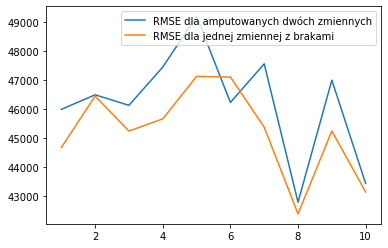

In [182]:
# Podsumowujący wykres
x=list(range(1,11))
plt.plot(x,RMSE2)
plt.plot(x,RMSE1)
plt.legend(["RMSE dla amputowanych dwóch zmiennych", "RMSE dla jednej zmiennej z brakami"])

In [134]:
R

,0,1,2,3,4,5,6,7,8,9
0,74874,45745,20509,76759,97666,22947,1546,57736,12329,39826
1,56167,49169,30883,29195,19840,22718,32106,25882,4890,32422
2,43367,55722,94842,86236,59375,64717,74803,70082,80592,7568
3,79394,2902,65795,82265,47820,51878,21721,41519,99804,19972
4,15344,35081,42801,64040,48824,75318,74431,71316,48217,32801
...,...,...,...,...,...,...,...,...,...,...
9994,81205,40743,95477,24871,9138,24873,25193,15583,53248,5274
9995,96835,35077,64757,62200,31308,66628,78272,54655,32301,74608
9996,99476,18954,17620,61322,99018,4566,95914,34541,39401,94151
9997,73613,32243,90699,13834,78799,63527,90284,52534,53942,46005


Został przeprowadzony eksperyment symulacyjny w celu zbadania jakości imputacji danych z numerycznego zbioru z trzema zmiennymi dotyczącymi zakupów na platformie allegro. Eksperyment polegał na amputowaniu 10% rekordów przy stosunkowo dużej liczbie obserwacji 100 000, a następnie w drugim eksperymencie amputowano dodatkowe 10% w drugiej kolumnie. Obserwacje nie zmieniały się z eksperymentu na eksperyment, ale co pętle losowano amputowane rekordy. Eksperymenty w parach powórzono 10 razy. Porównanie jakości polegało jedynie na badaniu jak radzi sobie z trafnością algorytm KNN z 5 sąsiadami i jak zmienna jest ta trafności w zależności od amputacji jednej kolumny i dwóch kolumn. Oceny trafności dokonano na podstawie RMSE.  W jednokolumnowy eksperymencie odchylenie standardowe 10 wyników RMSE wynosiło 1904.6976896318452 . W dwu kolumnowym eksperymencie odchyenie standardowe M wyników wynosiło 1553.046382651422 . Średnio jednokolumnowy eksperyment notował niższe RMSE, a dwukolumnowy wyższe RMSE. 